## Skip Connection
----

**Skip Connection** - метод внедрения выходных данных одного слоя с входными данным второго слоя. 
Придуман и использается в CNN для избежания переобучения модели, потери нужных фичей.

## Полезные ссылки:
https://habr.com/ru/articles/688350/

Concatenate layer -- проверить
Average layer -- проверить
Maximum layer -- проверить
Minimum layer -- проверить
Add layer -- проверить
Subtract layer -- проверить
Multiply layer -- проверить
Dot layer -- минус.

In [ ]:
import numpy as np
import tensorflow as tf

----
## Concatenate

На вход принимает список слоёв с одинаковым shape, кроме одного(будет указан в axis)
Возвращает объединённый tensor, состоящий из входных слоёв.
Помогает вообще не терять фичи, а просто переносит их с одного места на другое. 

In [ ]:
x = np.arange(10).reshape(5, 2)
y = np.arange(10, 25).reshape(5, 3)
print(x)
print(y)
res = tf.keras.layers.Concatenate(axis=1)([x, y])
print(res)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[[10 11 12]
 [13 14 15]
 [16 17 18]
 [19 20 21]
 [22 23 24]]
tf.Tensor(
[[ 0  1 10 11 12]
 [ 2  3 13 14 15]
 [ 4  5 16 17 18]
 [ 6  7 19 20 21]
 [ 8  9 22 23 24]], shape=(5, 5), dtype=int64)


----
## Average
Принимает слои с идентичной формой и хранит **среднее арифметическое** соответственных нейронов каждого слоя


In [ ]:
x = np.ones(4).reshape(2, 2)
y = np.zeros(4).reshape(2, 2)
print(x)
print(y)
res = tf.keras.layers.Average()([x, y])
print(res)

[[1. 1.]
 [1. 1.]]
[[0. 0.]
 [0. 0.]]
tf.Tensor(
[[0.5 0.5]
 [0.5 0.5]], shape=(2, 2), dtype=float32)


----
## Maximum
Принимает слои с идентичной формой и хранит **наибольший** из нейронов на каждой позиции

In [ ]:
x = np.array([[1, 5], [4, 8]])
y = np.array([[2, 3], [7, 6]])
print(x)
print(y)
res = tf.keras.layers.Maximum()([x, y])
print(res)

[[1 5]
 [4 8]]
[[2 3]
 [7 6]]
tf.Tensor(
[[2 5]
 [7 8]], shape=(2, 2), dtype=int64)


----
## Minimum
Принимает слои с идентичной формой и хранит **наименьший** из нейронов на каждой позиции

In [ ]:
x = np.array([[1, 5], [4, 8]])
y = np.array([[2, 3], [7, 6]])
print(x)
print(y)
res = tf.keras.layers.Minimum()([x, y])
print(res)

[[1 5]
 [4 8]]
[[2 3]
 [7 6]]
tf.Tensor(
[[1 3]
 [4 6]], shape=(2, 2), dtype=int64)


----
## Add
Принимает слои с идентичной формой и возвращает поэлементную **сумму** значений нейронов на соответствующих местах

In [ ]:
x = np.arange(4).reshape(2, 2)
y = np.arange(4, 8).reshape(2, 2)
print(x)
print(y)
res = tf.keras.layers.Add()([x, y])
print(res)

[[0 1]
 [2 3]]
[[4 5]
 [6 7]]
tf.Tensor(
[[ 4  6]
 [ 8 10]], shape=(2, 2), dtype=int64)


----
## Subtract
Принимает слои с идентичной формой и возвращает поэлементную **разность** значений нейронов на соответствующих местах

In [ ]:
x = np.arange(4, 8).reshape(2, 2)
y = np.arange(4).reshape(2, 2)
print(x)
print(y)
res = tf.keras.layers.Subtract()([x, y])
print(res)

[[4 5]
 [6 7]]
[[0 1]
 [2 3]]
tf.Tensor(
[[4 4]
 [4 4]], shape=(2, 2), dtype=int64)


----
## Multiply
Принимает слои с идентичной формой и возвращает поэлементное **перемножение** значений нейронов на соответствующих местах

In [ ]:
x = np.arange(4).reshape(2, 2)
y = np.arange(4, 8).reshape(2, 2)
print(x)
print(y)
res = tf.keras.layers.Multiply()([x, y])
print(res)

[[0 1]
 [2 3]]
[[4 5]
 [6 7]]
tf.Tensor(
[[ 0  5]
 [12 21]], shape=(2, 2), dtype=int64)


----
## Dot
Перемножает нейроны слоёв как **матрицы**
этот вариант не подходит для наших целей

In [ ]:
x = np.arange(10).reshape(1, 5, 2)
y = np.arange(10, 20).reshape(1, 2, 5)
print(x)
print(y)
res = tf.keras.layers.Dot(axes=(1, 2))([x, y])
print(res)

[[[0 1]
  [2 3]
  [4 5]
  [6 7]
  [8 9]]]
[[[10 11 12 13 14]
  [15 16 17 18 19]]]
tf.Tensor(
[[[260 360]
  [320 445]]], shape=(1, 2, 2), dtype=int64)


Импорт библиотек

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
% cd drive / MyDrive / project / YaMlProject
% ls

/content/drive/MyDrive/project/YaMlProject
core/  data/  models/  notebooks/  README.md  requirements.txt


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import torchvision as tv
from livelossplot import PlotLossesKeras

from core.datasets import get_ds

In [ ]:
train_ds, val_ds, test_ds = get_ds('repaired_data_train', 'repaired_data_test', back=3)

In [ ]:
crop = tv.transforms.CenterCrop(size=(28, 22))
inverter = tv.transforms.RandomInvert(p=0.4)
posterizer = tv.transforms.RandomPosterize(bits=6, p=0.4)
jitter = tv.transforms.ColorJitter(brightness=.2, hue=0.2, contrast=0.5)
perspective = tv.transforms.RandomPerspective(distortion_scale=0.2, p=0.4)
affine = tv.transforms.RandomAffine(degrees=(-15, 15), translate=(0, 0.1), scale=(0.85, 1))
gray_scale = tv.transforms.Grayscale(num_output_channels=3)
solarizer = tv.transforms.RandomSolarize(threshold=100.0, p=0.4)
equalizer = tv.transforms.RandomEqualize(p=0.4)

transformer = tv.transforms.Compose([
    jitter,
    inverter,
    perspective
])
train_ds.transform = transformer

get_model возвращает модель с нужным skip-connection

In [ ]:
def get_model(skip_con):
    input_net = tf.keras.layers.Input((32, 32, 3))

    ## Encoder starts
    conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_net)
    conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    batch_norm = tf.keras.layers.BatchNormalization()(conv2)
    poll1 = tf.keras.layers.AveragePooling2D((2, 2))(batch_norm)
    conv3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(poll1)

    # conv4 = tf.keras.layers.Conv2D(128, 3, strides=(2, 2), activation='relu', padding='same')(conv3)
    poll2 = tf.keras.layers.AveragePooling2D((2, 2))(conv3)

    ## And now the decoder
    up1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(
        tf.keras.layers.UpSampling2D(size=(2, 2))(poll2))
    merge1 = skip_con([conv3, up1])
    up2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(
        tf.keras.layers.UpSampling2D(size=(2, 2))(merge1))
    merge2 = skip_con([conv2, up2])
    up3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(
        tf.keras.layers.UpSampling2D(size=(2, 2))(merge2))

    conv5 = tf.keras.layers.Conv2D(3, (3, 3), padding='same')(up3)
    poll3 = tf.keras.layers.AveragePooling2D((2, 2))(conv5)

    flatten = tf.keras.layers.Flatten()(poll3)
    dense1 = tf.keras.layers.Dense(128, activation='relu')(flatten)
    dense2 = tf.keras.layers.Dense(64, activation='relu')(dense1)
    output_net = tf.keras.layers.Dense(10, activation='softmax')(dense2)

    model = tf.keras.models.Model(inputs=input_net, outputs=output_net)
    return model

----
## Concatenate model

In [ ]:
concatenate_model = get_model(tf.keras.layers.Concatenate(axis=3))
concatenate_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 32, 32, 32)   896         ['input_2[0][0]']                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 32, 32, 64)   18496       ['conv2d_7[0][0]']               
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 32, 32, 64)  256         ['conv2d_8[0][0]']               
 rmalization)                                                                               

In [ ]:
concatenate_model.compile(optimizer='adam', metrics=['accuracy'],
                          loss=tf.keras.losses.SparseCategoricalCrossentropy())

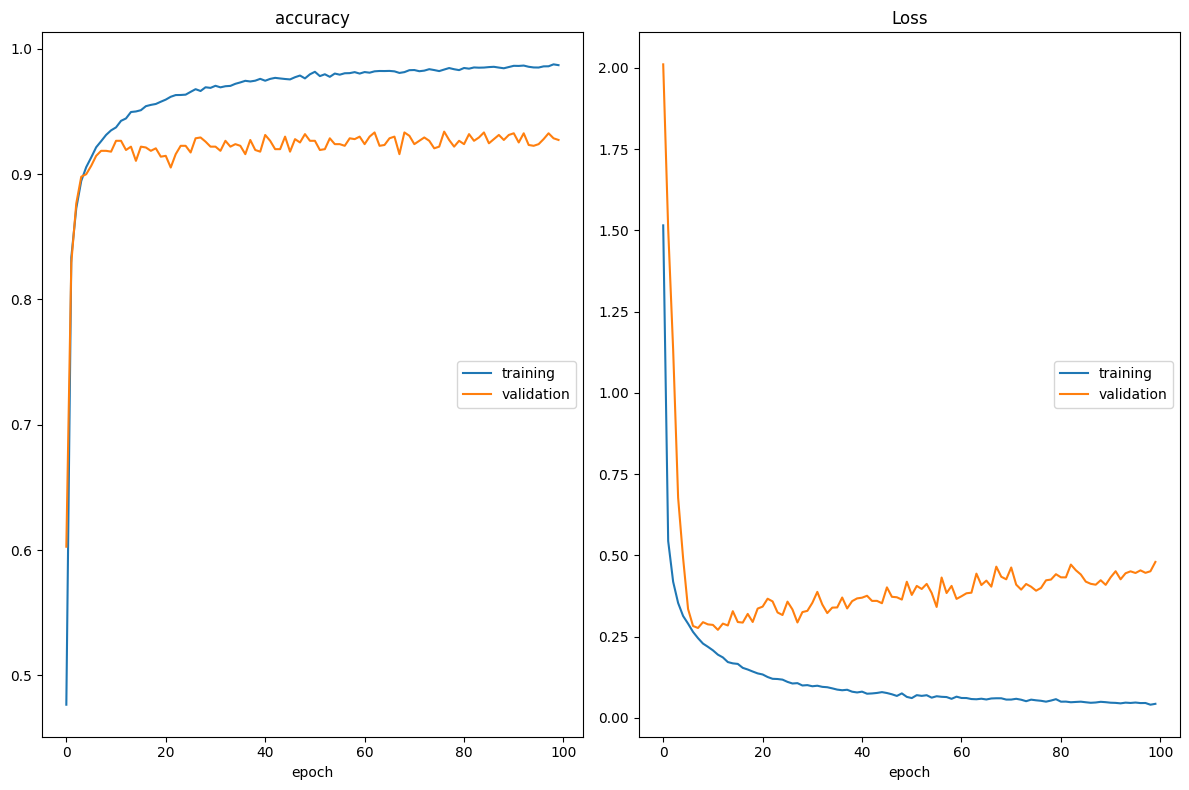

accuracy
	training         	 (min:    0.477, max:    0.988, cur:    0.987)
	validation       	 (min:    0.603, max:    0.934, cur:    0.927)
Loss
	training         	 (min:    0.041, max:    1.516, cur:    0.043)
	validation       	 (min:    0.271, max:    2.011, cur:    0.480)


In [ ]:
concatenate_model.fit(train_ds, validation_data=val_ds, epochs=100,
                      callbacks=[PlotLossesKeras()], verbose=False)

----
## Average model

In [ ]:
average_model = get_model(tf.keras.layers.Average())
average_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_35 (Conv2D)             (None, 32, 32, 32)   896         ['input_6[0][0]']                
                                                                                                  
 conv2d_36 (Conv2D)             (None, 32, 32, 64)   18496       ['conv2d_35[0][0]']              
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 32, 32, 64)  256         ['conv2d_36[0][0]']              
 rmalization)                                                                               

In [ ]:
average_model.compile(optimizer='adam', metrics=['accuracy'],
                      loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [ ]:
average_model.fit(train_ds, validation_data=val_ds, epochs=100,
                  callbacks=[PlotLossesKeras()], verbose=False)

KeyboardInterrupt: 

----
## Maximum model

In [ ]:
maximum_model = get_model(tf.keras.layers.Maximum())
maximum_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_21 (Conv2D)             (None, 32, 32, 32)   896         ['input_4[0][0]']                
                                                                                                  
 conv2d_22 (Conv2D)             (None, 32, 32, 64)   18496       ['conv2d_21[0][0]']              
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 32, 32, 64)  256         ['conv2d_22[0][0]']              
 rmalization)                                                                               

In [ ]:
maximum_model.compile(optimizer='adam', metrics=['accuracy'],
                      loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [ ]:
maximum_model.fit(train_ds, validation_data=val_ds, epochs=100,
                  callbacks=[PlotLossesKeras()], verbose=False)

----
## Minimum model

In [ ]:
minimum_model = get_model(tf.keras.layers.Minimum())
minimum_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_28 (Conv2D)             (None, 32, 32, 32)   896         ['input_5[0][0]']                
                                                                                                  
 conv2d_29 (Conv2D)             (None, 32, 32, 64)   18496       ['conv2d_28[0][0]']              
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 32, 32, 64)  256         ['conv2d_29[0][0]']              
 rmalization)                                                                               

In [ ]:
minimum_model.compile(optimizer='adam', metrics=['accuracy'],
                      loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [ ]:
minimum_model.fit(train_ds, validation_data=val_ds, epochs=100,
                  callbacks=[PlotLossesKeras()], verbose=False)

----
## Add model

In [ ]:
add_model = get_model(tf.keras.layers.Add())
add_model.summary()

In [ ]:
add_model.compile(optimizer='adam', metrics=['accuracy'],
                      loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [ ]:
add_model.fit(train_ds, validation_data=val_ds, epochs=100,
                  callbacks=[PlotLossesKeras()], verbose=False)

----
## Subtract model

In [ ]:
subtract_model = get_model(tf.keras.layers.Subtract())
subtract_model.summary()

In [ ]:
subtract_model.compile(optimizer='adam', metrics=['accuracy'],
                      loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [ ]:
subtract_model.fit(train_ds, validation_data=val_ds, epochs=100,
                  callbacks=[PlotLossesKeras()], verbose=False)

----
## Multiply model

In [ ]:
multiply_model = get_model(tf.keras.layers.Multiply())
multiply_model.summary()

In [ ]:
multiply_model.compile(optimizer='adam', metrics=['accuracy'],
                      loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [ ]:
multiply_model.fit(train_ds, validation_data=val_ds, epochs=100,
                  callbacks=[PlotLossesKeras()], verbose=False)